# *1．要点*

●過学習（over fitting）

・テスト誤差と訓練後里で学習曲線が乖離することで，特定の訓練サンプルに対して，特化して学習する．

【主な原因】

　　・パラメータの数が多い 　・パラメータの値が適切でない　　・ノードが多いなど　

→　ネットークの自由度（層数，ノード数，パラメータの値など）が高い

●正則化（regularization）：ネットワークの自由度を制約すること

→　**正則化手法**を利用して過学習を抑制する

①L1正則化，L2正則化　　②ドロップアウト

●Weight decay（荷重減衰）

【過学習の原因】

・重みが大きい値をとることで過学習が発生することがある

　→学習させていくと重みにばらつきが発生する．重みが大きい値は学習において重要な値．重みが大きいと過学習が起こる．

【過学習の解決策】

・誤差に対して正則化項を加算することで重みを抑制する

　→過学習が起こりそうな重みの大きさ以下で重みをコントロールし，かつ重みの大きさにばらつきを出す必要がある

●L1,L2正則化

$E_n(w) + \frac{1}{p}\lambda \parallel x \parallel _p$ 　：誤差関数にpノルムを加える

$\parallel x \parallel _p = (|x_1|^p + ....+|x_n|^p)^{\frac{1}{p}}$  ：pノルムの計算

p = 1 のとき　L1正則化　**ラッソ回帰**　（マンハッタン距離）

p = 2 のとき　L2正則化　**リッジ回帰**　（ユークリッド距離）

●正則化の計算

$\parallel w^{(1)} \parallel _p = (|w_1^{(1)}|^p + .... + |w_n^{(1)}|^p)^{\frac{1}{p}}$

$\parallel w^{(2)} \parallel _p = (|w_1^{(2)}|^p + .... + |w_n^{(2)}|^p)^{\frac{1}{p}}$

$\parallel x \parallel _p = (|w^{(1)}|^p + |w^{(2)}|^p)$

$E_n(w) + \frac{1}{p} \lambda \parallel x \parallel _p$

●数式とコード

$\parallel x \parallel _p = (|x_1|^p + ....+|x_n|^p)^{\frac{1}{p}}$

np.sum(np.abs(network.params['W' + str(idx)]))


$E_n(w) + \frac{1}{p} \lambda \parallel x \parallel _p$

weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

loss = network.loss(x_batch, d_batch) + weight_decay

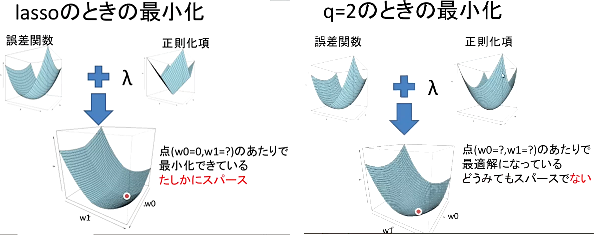

●ドロップアウト

・ランダムにノードを削除して学習させること．データ量を変化させずに異なるモデルを学習させていると解釈できる．

# *2．確認テスト*

**確認テスト**　

機械学習で使われる線形モデル（線形回帰，主成分分析など）の正則化はモデルの重みを制限することで可能となる．前述の正則化手法の中にリッジ回帰という手法がある．その特徴として正しいものを選択しなさい

（a）ハイパーパラメータを大きな値にするとすべての重みが限りなく0に近づく

（b）ハイパーパラメータを0に設定すると非線形回帰となる

（c）バイアス項についても正則化される

（d）リッジ回帰の場合隠れ層に対して正則化項を加える


**解答**　：

**確認テスト**

下図においてL1正則化を表しているグラフはどちらか

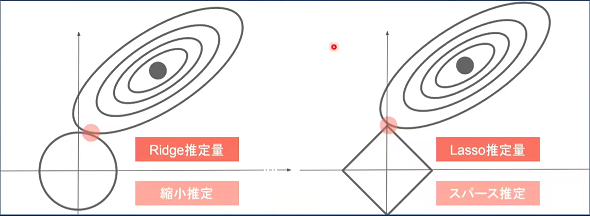

**解答**

Lasso推定量

横軸方向の1つの重みが0になることを表している

**例題チャレンジ1**

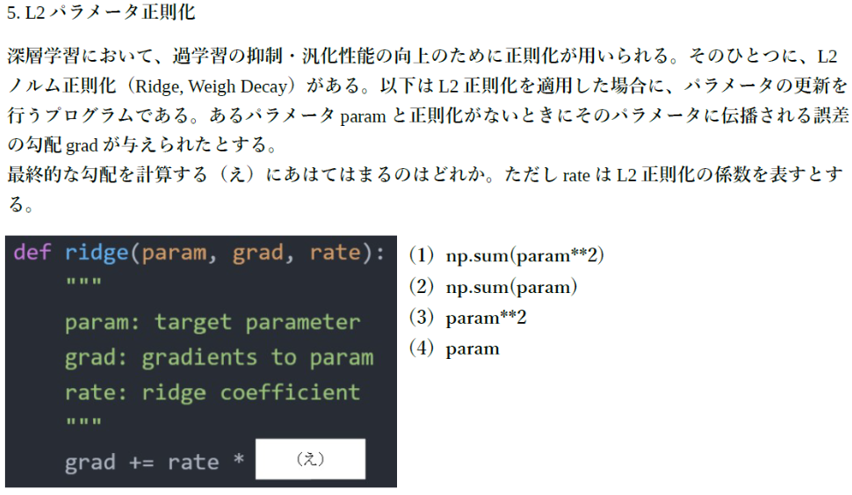

**解答**　：（4）

**例題チャレンジ2**

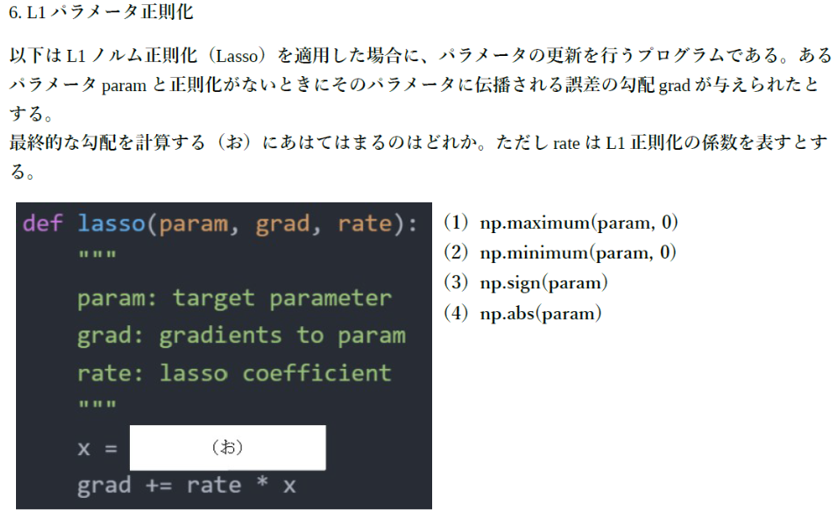

**解答**　：（3）x>0で出力1，x<0で出力-1, x=0で出力0を出力する関数　np.sign(x) 

**例題チャレンジ3**

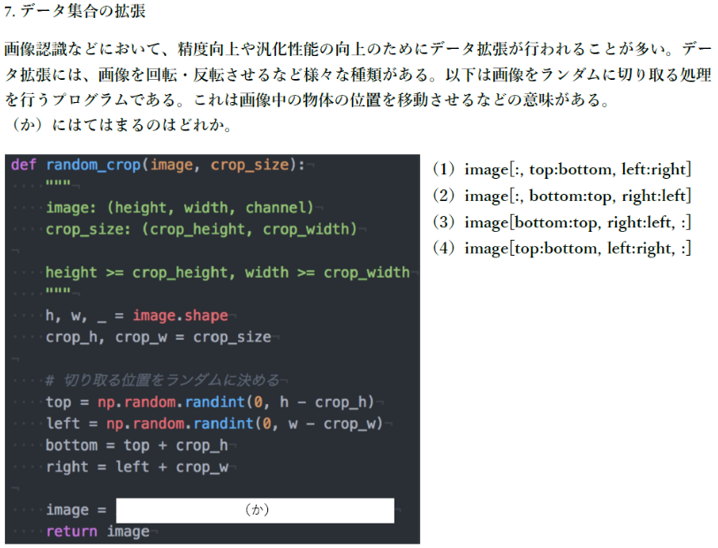

# *3．実装演習*

# *準備*

## Googleドライブのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/E/stage3/DNN_code_colab_lesson_1_2')
sys.path.append('/content/drive/MyDrive/E/stage3/DNN_code_colab_lesson_1_2/lesson_2')

# overfiting

In [ ]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")


データ読み込み完了


In [ ]:
# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        


Generation: 10. 正答率(トレーニング) = 0.15
                : 10. 正答率(テスト) = 0.1235
Generation: 20. 正答率(トレーニング) = 0.23333333333333334
                : 20. 正答率(テスト) = 0.1589
Generation: 30. 正答率(トレーニング) = 0.31
                : 30. 正答率(テスト) = 0.1976
Generation: 40. 正答率(トレーニング) = 0.34
                : 40. 正答率(テスト) = 0.2345
Generation: 50. 正答率(トレーニング) = 0.4
                : 50. 正答率(テスト) = 0.267
Generation: 60. 正答率(トレーニング) = 0.44666666666666666
                : 60. 正答率(テスト) = 0.3066
Generation: 70. 正答率(トレーニング) = 0.51
                : 70. 正答率(テスト) = 0.3622
Generation: 80. 正答率(トレーニング) = 0.59
                : 80. 正答率(テスト) = 0.4309
Generation: 90. 正答率(トレーニング) = 0.6533333333333333
                : 90. 正答率(テスト) = 0.4835
Generation: 100. 正答率(トレーニング) = 0.6766666666666666
                : 100. 正答率(テスト) = 0.5174
Generation: 110. 正答率(トレーニング) = 0.7166666666666667
                : 110. 正答率(テスト) = 0.5517
Generation: 120. 正答率(トレーニング) = 0.7633333333333333
                : 120. 正答率(テスト) = 0.5887
Generation

In [ ]:
lists = range(0, iters_num, plot_interval)


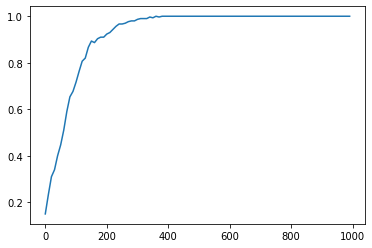

In [ ]:
plt.plot(lists, accuracies_train, label="training set")

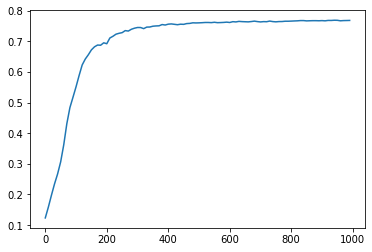

In [ ]:
plt.plot(lists, accuracies_test,  label="test set")

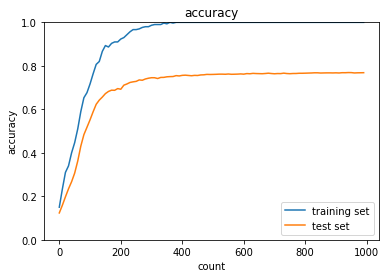

In [ ]:
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

In [ ]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================


データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


Generation: 10. 正答率(トレーニング) = 0.17
                : 10. 正答率(テスト) = 0.1508
Generation: 20. 正答率(トレーニング) = 0.25666666666666665
                : 20. 正答率(テスト) = 0.2197
Generation: 30. 正答率(トレーニング) = 0.32
                : 30. 正答率(テスト) = 0.2701
Generation: 40. 正答率(トレーニング) = 0.39
                : 40. 正答率(テスト) = 0.3056
Generation: 50. 正答率(トレーニング) = 0.4533333333333333
                : 50. 正答率(テスト) = 0.3488
Generation: 60. 正答率(トレーニング) = 0.49333333333333335
                : 60. 正答率(テスト) = 0.3736
Generation: 70. 正答率(トレーニング) = 0.5333333333333333
                : 70. 正答率(テスト) = 0.3916
Generation: 80. 正答率(トレーニング) = 0.57
                : 80. 正答率(テスト) = 0.4178
Generation: 90. 正答率(トレーニング) = 0.5933333333333334
                : 90. 正答率(テスト) = 0.4345
Generation: 100. 正答率(トレーニング) = 0.64
                : 100. 正答率(テスト) = 0.4643
Generation: 110. 正答率(トレーニング) = 0.69
                : 110. 正答率(テスト) = 0.5067
Generation: 120. 正答率(トレーニング) = 0.7
                : 120. 正答率(テスト) = 0.5225
Generation: 130. 正答率(トレ

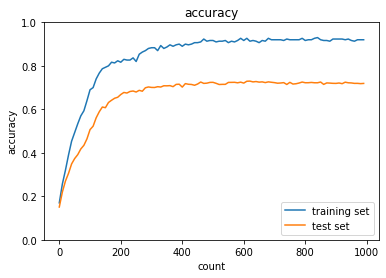

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

In [ ]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================


データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
    

Generation: 10. 正答率(トレーニング) = 0.3433333333333333
                : 10. 正答率(テスト) = 0.2764
Generation: 20. 正答率(トレーニング) = 0.6
                : 20. 正答率(テスト) = 0.466
Generation: 30. 正答率(トレーニング) = 0.78
                : 30. 正答率(テスト) = 0.5818
Generation: 40. 正答率(トレーニング) = 0.71
                : 40. 正答率(テスト) = 0.5639
Generation: 50. 正答率(トレーニング) = 0.7633333333333333
                : 50. 正答率(テスト) = 0.6148
Generation: 60. 正答率(トレーニング) = 0.88
                : 60. 正答率(テスト) = 0.6679
Generation: 70. 正答率(トレーニング) = 0.7966666666666666
                : 70. 正答率(テスト) = 0.6116
Generation: 80. 正答率(トレーニング) = 0.7766666666666666
                : 80. 正答率(テスト) = 0.6183
Generation: 90. 正答率(トレーニング) = 0.7233333333333334
                : 90. 正答率(テスト) = 0.5915
Generation: 100. 正答率(トレーニング) = 0.8633333333333333
                : 100. 正答率(テスト) = 0.6705
Generation: 110. 正答率(トレーニング) = 0.9
                : 110. 正答率(テスト) = 0.6884
Generation: 120. 正答率(トレーニング) = 0.8333333333333334
                : 120. 正答率(テスト) = 0.6509

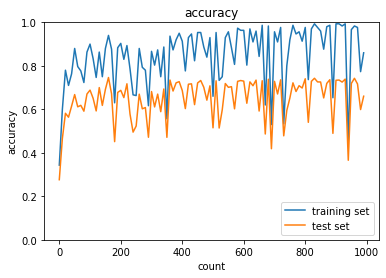

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

**try1：weight_decay_lambda = 0.1**

In [ ]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================


データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
    

Generation: 10. 正答率(トレーニング) = 0.13
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.13
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.13
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.13
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.13
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.13
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.13
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.13
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.13
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.13
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.13
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.13
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.13
                : 130. 正答率(テスト) = 0.1135
Generation: 140. 

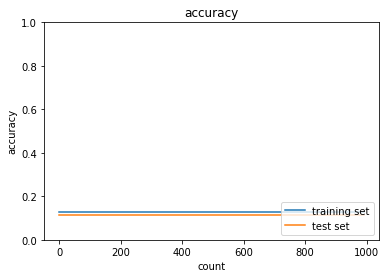

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**try2：weight_decay_lambda = 0.01**

In [ ]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.01
# =================================================


データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
    

Generation: 10. 正答率(トレーニング) = 0.41
                : 10. 正答率(テスト) = 0.3294
Generation: 20. 正答率(トレーニング) = 0.36333333333333334
                : 20. 正答率(テスト) = 0.3049
Generation: 30. 正答率(トレーニング) = 0.6666666666666666
                : 30. 正答率(テスト) = 0.514
Generation: 40. 正答率(トレーニング) = 0.66
                : 40. 正答率(テスト) = 0.5161
Generation: 50. 正答率(トレーニング) = 0.5166666666666667
                : 50. 正答率(テスト) = 0.4185
Generation: 60. 正答率(トレーニング) = 0.6533333333333333
                : 60. 正答率(テスト) = 0.5482
Generation: 70. 正答率(トレーニング) = 0.49333333333333335
                : 70. 正答率(テスト) = 0.3778
Generation: 80. 正答率(トレーニング) = 0.56
                : 80. 正答率(テスト) = 0.4406
Generation: 90. 正答率(トレーニング) = 0.42
                : 90. 正答率(テスト) = 0.3686
Generation: 100. 正答率(トレーニング) = 0.44
                : 100. 正答率(テスト) = 0.3901
Generation: 110. 正答率(トレーニング) = 0.6033333333333334
                : 110. 正答率(テスト) = 0.507
Generation: 120. 正答率(トレーニング) = 0.57
                : 120. 正答率(テスト) = 0.4918
Generation

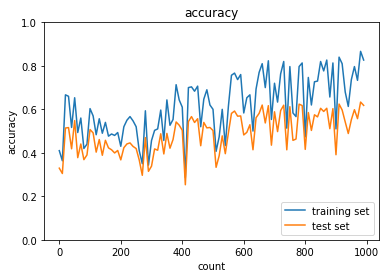

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**try3：weight_decay_lambda = 0.001**

In [ ]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.001
# =================================================


データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
    

Generation: 10. 正答率(トレーニング) = 0.41
                : 10. 正答率(テスト) = 0.3338
Generation: 20. 正答率(トレーニング) = 0.6566666666666666
                : 20. 正答率(テスト) = 0.5026
Generation: 30. 正答率(トレーニング) = 0.84
                : 30. 正答率(テスト) = 0.6711
Generation: 40. 正答率(トレーニング) = 0.6833333333333333
                : 40. 正答率(テスト) = 0.5101
Generation: 50. 正答率(トレーニング) = 0.8866666666666667
                : 50. 正答率(テスト) = 0.6777
Generation: 60. 正答率(トレーニング) = 0.9766666666666667
                : 60. 正答率(テスト) = 0.7692
Generation: 70. 正答率(トレーニング) = 0.9933333333333333
                : 70. 正答率(テスト) = 0.7818
Generation: 80. 正答率(トレーニング) = 0.9966666666666667
                : 80. 正答率(テスト) = 0.7872
Generation: 90. 正答率(トレーニング) = 0.9966666666666667
                : 90. 正答率(テスト) = 0.7942
Generation: 100. 正答率(トレーニング) = 1.0
                : 100. 正答率(テスト) = 0.7958
Generation: 110. 正答率(トレーニング) = 1.0
                : 110. 正答率(テスト) = 0.7918
Generation: 120. 正答率(トレーニング) = 1.0
                : 120. 正答率(テスト) = 0.7853

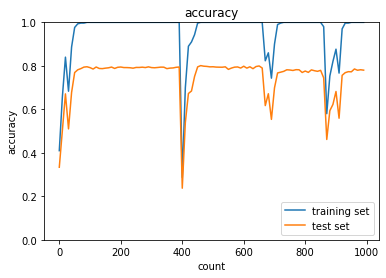

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**try4：weight_decay_lambda = 0.0001**

In [ ]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.0001
# =================================================


データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
    

Generation: 10. 正答率(トレーニング) = 0.6033333333333334
                : 10. 正答率(テスト) = 0.4396
Generation: 20. 正答率(トレーニング) = 0.7533333333333333
                : 20. 正答率(テスト) = 0.5859
Generation: 30. 正答率(トレーニング) = 0.66
                : 30. 正答率(テスト) = 0.5392
Generation: 40. 正答率(トレーニング) = 0.9033333333333333
                : 40. 正答率(テスト) = 0.6706
Generation: 50. 正答率(トレーニング) = 0.9166666666666666
                : 50. 正答率(テスト) = 0.7085
Generation: 60. 正答率(トレーニング) = 0.9866666666666667
                : 60. 正答率(テスト) = 0.7533
Generation: 70. 正答率(トレーニング) = 0.99
                : 70. 正答率(テスト) = 0.7558
Generation: 80. 正答率(トレーニング) = 1.0
                : 80. 正答率(テスト) = 0.7639
Generation: 90. 正答率(トレーニング) = 1.0
                : 90. 正答率(テスト) = 0.7581
Generation: 100. 正答率(トレーニング) = 1.0
                : 100. 正答率(テスト) = 0.7607
Generation: 110. 正答率(トレーニング) = 1.0
                : 110. 正答率(テスト) = 0.7619
Generation: 120. 正答率(トレーニング) = 1.0
                : 120. 正答率(テスト) = 0.7596
Generation: 130. 正答率(トレーニング) 

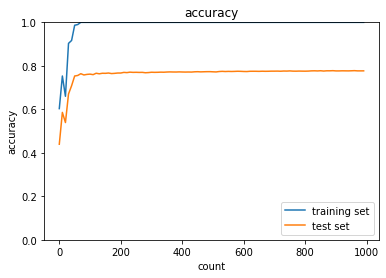

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout

In [ ]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        

Generation: 10. 正答率(トレーニング) = 0.11
                : 10. 正答率(テスト) = 0.0913
Generation: 20. 正答率(トレーニング) = 0.12666666666666668
                : 20. 正答率(テスト) = 0.1095
Generation: 30. 正答率(トレーニング) = 0.18
                : 30. 正答率(テスト) = 0.127
Generation: 40. 正答率(トレーニング) = 0.20666666666666667
                : 40. 正答率(テスト) = 0.1448
Generation: 50. 正答率(トレーニング) = 0.25333333333333335
                : 50. 正答率(テスト) = 0.1728
Generation: 60. 正答率(トレーニング) = 0.2733333333333333
                : 60. 正答率(テスト) = 0.1924
Generation: 70. 正答率(トレーニング) = 0.2966666666666667
                : 70. 正答率(テスト) = 0.2081
Generation: 80. 正答率(トレーニング) = 0.31333333333333335
                : 80. 正答率(テスト) = 0.229
Generation: 90. 正答率(トレーニング) = 0.3233333333333333
                : 90. 正答率(テスト) = 0.2404
Generation: 100. 正答率(トレーニング) = 0.37333333333333335
                : 100. 正答率(テスト) = 0.2686
Generation: 110. 正答率(トレーニング) = 0.38333333333333336
                : 110. 正答率(テスト) = 0.2822
Generation: 120. 正答率(トレーニング) = 0.41333333

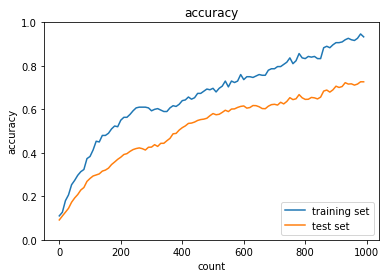

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

**try1 : dropout_ratio = 0.3**

In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.3
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        

Generation: 10. 正答率(トレーニング) = 0.11666666666666667
                : 10. 正答率(テスト) = 0.1017
Generation: 20. 正答率(トレーニング) = 0.12333333333333334
                : 20. 正答率(テスト) = 0.1059
Generation: 30. 正答率(トレーニング) = 0.13666666666666666
                : 30. 正答率(テスト) = 0.1138
Generation: 40. 正答率(トレーニング) = 0.13333333333333333
                : 40. 正答率(テスト) = 0.1175
Generation: 50. 正答率(トレーニング) = 0.14333333333333334
                : 50. 正答率(テスト) = 0.1267
Generation: 60. 正答率(トレーニング) = 0.15333333333333332
                : 60. 正答率(テスト) = 0.1374
Generation: 70. 正答率(トレーニング) = 0.14666666666666667
                : 70. 正答率(テスト) = 0.1357
Generation: 80. 正答率(トレーニング) = 0.14666666666666667
                : 80. 正答率(テスト) = 0.1369
Generation: 90. 正答率(トレーニング) = 0.16
                : 90. 正答率(テスト) = 0.1509
Generation: 100. 正答率(トレーニング) = 0.17
                : 100. 正答率(テスト) = 0.157
Generation: 110. 正答率(トレーニング) = 0.20333333333333334
                : 110. 正答率(テスト) = 0.1825
Generation: 120. 正答率(トレーニング) = 0.22
 

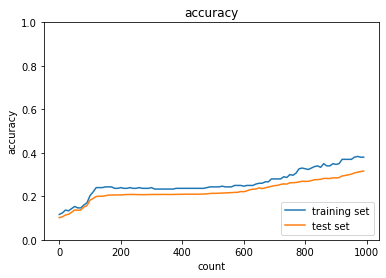

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**try2 : dropout_ratio = 0.2**

In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        

Generation: 10. 正答率(トレーニング) = 0.14
                : 10. 正答率(テスト) = 0.121
Generation: 20. 正答率(トレーニング) = 0.15
                : 20. 正答率(テスト) = 0.1264
Generation: 30. 正答率(トレーニング) = 0.15666666666666668
                : 30. 正答率(テスト) = 0.13
Generation: 40. 正答率(トレーニング) = 0.15666666666666668
                : 40. 正答率(テスト) = 0.1299
Generation: 50. 正答率(トレーニング) = 0.15666666666666668
                : 50. 正答率(テスト) = 0.1291
Generation: 60. 正答率(トレーニング) = 0.16666666666666666
                : 60. 正答率(テスト) = 0.1319
Generation: 70. 正答率(トレーニング) = 0.16333333333333333
                : 70. 正答率(テスト) = 0.1344
Generation: 80. 正答率(トレーニング) = 0.16666666666666666
                : 80. 正答率(テスト) = 0.1352
Generation: 90. 正答率(トレーニング) = 0.17
                : 90. 正答率(テスト) = 0.1383
Generation: 100. 正答率(トレーニング) = 0.17666666666666667
                : 100. 正答率(テスト) = 0.1433
Generation: 110. 正答率(トレーニング) = 0.17
                : 110. 正答率(テスト) = 0.1421
Generation: 120. 正答率(トレーニング) = 0.17666666666666667
                : 

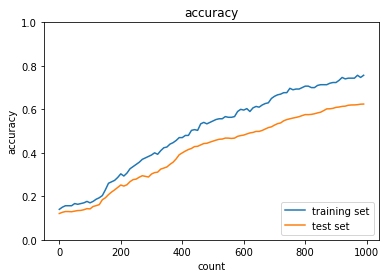

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**try3 : dropout_ratio = 0.05**

In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.05
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        

Generation: 10. 正答率(トレーニング) = 0.15666666666666668
                : 10. 正答率(テスト) = 0.1018
Generation: 20. 正答率(トレーニング) = 0.20666666666666667
                : 20. 正答率(テスト) = 0.1256
Generation: 30. 正答率(トレーニング) = 0.23
                : 30. 正答率(テスト) = 0.1477
Generation: 40. 正答率(トレーニング) = 0.26
                : 40. 正答率(テスト) = 0.1782
Generation: 50. 正答率(トレーニング) = 0.29333333333333333
                : 50. 正答率(テスト) = 0.2049
Generation: 60. 正答率(トレーニング) = 0.3333333333333333
                : 60. 正答率(テスト) = 0.2406
Generation: 70. 正答率(トレーニング) = 0.37666666666666665
                : 70. 正答率(テスト) = 0.2771
Generation: 80. 正答率(トレーニング) = 0.43333333333333335
                : 80. 正答率(テスト) = 0.311
Generation: 90. 正答率(トレーニング) = 0.47333333333333333
                : 90. 正答率(テスト) = 0.3489
Generation: 100. 正答率(トレーニング) = 0.5133333333333333
                : 100. 正答率(テスト) = 0.3647
Generation: 110. 正答率(トレーニング) = 0.53
                : 110. 正答率(テスト) = 0.3981
Generation: 120. 正答率(トレーニング) = 0.5466666666666666
    

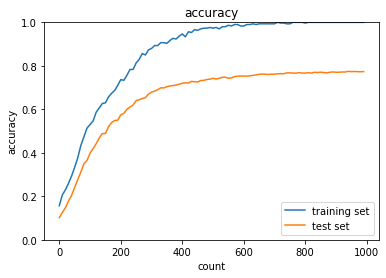

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

**try1 : optimizer = optimizer.Momentum, dropout_ratio = 0.15**



In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
#optimizer = optimizer.SGD(learning_rate=0.01)
optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        

Generation: 10. 正答率(トレーニング) = 0.22333333333333333
                : 10. 正答率(テスト) = 0.1521
Generation: 20. 正答率(トレーニング) = 0.38333333333333336
                : 20. 正答率(テスト) = 0.2977
Generation: 30. 正答率(トレーニング) = 0.37666666666666665
                : 30. 正答率(テスト) = 0.3193
Generation: 40. 正答率(トレーニング) = 0.44
                : 40. 正答率(テスト) = 0.3669
Generation: 50. 正答率(トレーニング) = 0.5266666666666666
                : 50. 正答率(テスト) = 0.4299
Generation: 60. 正答率(トレーニング) = 0.5633333333333334
                : 60. 正答率(テスト) = 0.4655
Generation: 70. 正答率(トレーニング) = 0.6266666666666667
                : 70. 正答率(テスト) = 0.5025
Generation: 80. 正答率(トレーニング) = 0.6233333333333333
                : 80. 正答率(テスト) = 0.5139
Generation: 90. 正答率(トレーニング) = 0.7133333333333334
                : 90. 正答率(テスト) = 0.5799
Generation: 100. 正答率(トレーニング) = 0.7733333333333333
                : 100. 正答率(テスト) = 0.6196
Generation: 110. 正答率(トレーニング) = 0.79
                : 110. 正答率(テスト) = 0.6509
Generation: 120. 正答率(トレーニング) = 0.853333333

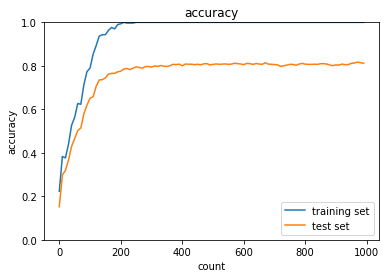

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**try2 : optimizer = optimizer.Momentum, dropout_ratio = 0.3**



In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.3
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
#optimizer = optimizer.SGD(learning_rate=0.01)
optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        

Generation: 10. 正答率(トレーニング) = 0.11666666666666667
                : 10. 正答率(テスト) = 0.1109
Generation: 20. 正答率(トレーニング) = 0.14666666666666667
                : 20. 正答率(テスト) = 0.1521
Generation: 30. 正答率(トレーニング) = 0.21
                : 30. 正答率(テスト) = 0.1873
Generation: 40. 正答率(トレーニング) = 0.27
                : 40. 正答率(テスト) = 0.2573
Generation: 50. 正答率(トレーニング) = 0.2866666666666667
                : 50. 正答率(テスト) = 0.2507
Generation: 60. 正答率(トレーニング) = 0.27
                : 60. 正答率(テスト) = 0.2404
Generation: 70. 正答率(トレーニング) = 0.2966666666666667
                : 70. 正答率(テスト) = 0.2644
Generation: 80. 正答率(トレーニング) = 0.31333333333333335
                : 80. 正答率(テスト) = 0.2802
Generation: 90. 正答率(トレーニング) = 0.32
                : 90. 正答率(テスト) = 0.2875
Generation: 100. 正答率(トレーニング) = 0.33666666666666667
                : 100. 正答率(テスト) = 0.299
Generation: 110. 正答率(トレーニング) = 0.38333333333333336
                : 110. 正答率(テスト) = 0.309
Generation: 120. 正答率(トレーニング) = 0.3933333333333333
                : 12

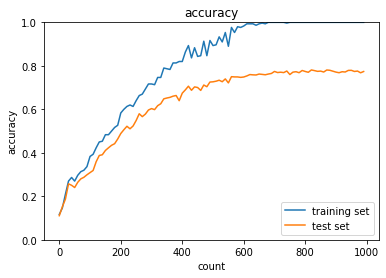

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**try3 : optimizer = optimizer.AdaGrad, dropout_ratio = 0.15**



In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
#optimizer = optimizer.SGD(learning_rate=0.01)
#optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        

Generation: 10. 正答率(トレーニング) = 0.43333333333333335
                : 10. 正答率(テスト) = 0.3821
Generation: 20. 正答率(トレーニング) = 0.6133333333333333
                : 20. 正答率(テスト) = 0.5028
Generation: 30. 正答率(トレーニング) = 0.81
                : 30. 正答率(テスト) = 0.651
Generation: 40. 正答率(トレーニング) = 0.92
                : 40. 正答率(テスト) = 0.7232
Generation: 50. 正答率(トレーニング) = 0.9566666666666667
                : 50. 正答率(テスト) = 0.7648
Generation: 60. 正答率(トレーニング) = 0.9733333333333334
                : 60. 正答率(テスト) = 0.7659
Generation: 70. 正答率(トレーニング) = 0.99
                : 70. 正答率(テスト) = 0.7802
Generation: 80. 正答率(トレーニング) = 0.99
                : 80. 正答率(テスト) = 0.7796
Generation: 90. 正答率(トレーニング) = 1.0
                : 90. 正答率(テスト) = 0.7916
Generation: 100. 正答率(トレーニング) = 1.0
                : 100. 正答率(テスト) = 0.7974
Generation: 110. 正答率(トレーニング) = 0.9966666666666667
                : 110. 正答率(テスト) = 0.8001
Generation: 120. 正答率(トレーニング) = 1.0
                : 120. 正答率(テスト) = 0.8019
Generation: 130. 正答率(トレーニング

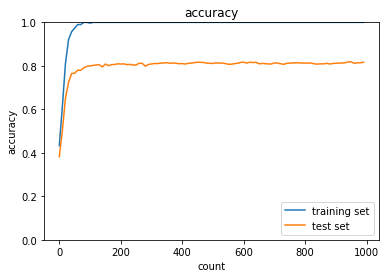

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**try4 : optimizer = optimizer.AdaGrad, dropout_ratio = 0.3**



In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.3
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
#optimizer = optimizer.SGD(learning_rate=0.01)
#optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        

Generation: 10. 正答率(トレーニング) = 0.28
                : 10. 正答率(テスト) = 0.2499
Generation: 20. 正答率(トレーニング) = 0.45
                : 20. 正答率(テスト) = 0.3881
Generation: 30. 正答率(トレーニング) = 0.4666666666666667
                : 30. 正答率(テスト) = 0.4109
Generation: 40. 正答率(トレーニング) = 0.6333333333333333
                : 40. 正答率(テスト) = 0.5541
Generation: 50. 正答率(トレーニング) = 0.7666666666666667
                : 50. 正答率(テスト) = 0.5923
Generation: 60. 正答率(トレーニング) = 0.8733333333333333
                : 60. 正答率(テスト) = 0.6604
Generation: 70. 正答率(トレーニング) = 0.9133333333333333
                : 70. 正答率(テスト) = 0.6974
Generation: 80. 正答率(トレーニング) = 0.9366666666666666
                : 80. 正答率(テスト) = 0.7349
Generation: 90. 正答率(トレーニング) = 0.9566666666666667
                : 90. 正答率(テスト) = 0.7422
Generation: 100. 正答率(トレーニング) = 0.9733333333333334
                : 100. 正答率(テスト) = 0.7613
Generation: 110. 正答率(トレーニング) = 0.9733333333333334
                : 110. 正答率(テスト) = 0.767
Generation: 120. 正答率(トレーニング) = 0.9766666666666

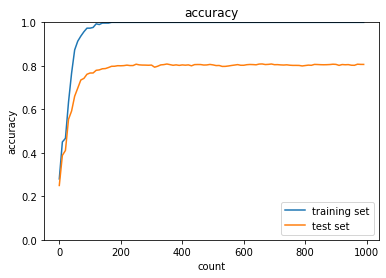

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**try4 : optimizer = optimizer.AdaGrad, dropout_ratio = 0.5**



In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.5
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
#optimizer = optimizer.SGD(learning_rate=0.01)
#optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        

Generation: 10. 正答率(トレーニング) = 0.21333333333333335
                : 10. 正答率(テスト) = 0.1947
Generation: 20. 正答率(トレーニング) = 0.24333333333333335
                : 20. 正答率(テスト) = 0.2204
Generation: 30. 正答率(トレーニング) = 0.25333333333333335
                : 30. 正答率(テスト) = 0.2223
Generation: 40. 正答率(トレーニング) = 0.29
                : 40. 正答率(テスト) = 0.2382
Generation: 50. 正答率(トレーニング) = 0.2866666666666667
                : 50. 正答率(テスト) = 0.2414
Generation: 60. 正答率(トレーニング) = 0.3
                : 60. 正答率(テスト) = 0.2501
Generation: 70. 正答率(トレーニング) = 0.3333333333333333
                : 70. 正答率(テスト) = 0.2659
Generation: 80. 正答率(トレーニング) = 0.35333333333333333
                : 80. 正答率(テスト) = 0.2689
Generation: 90. 正答率(トレーニング) = 0.35333333333333333
                : 90. 正答率(テスト) = 0.2762
Generation: 100. 正答率(トレーニング) = 0.4
                : 100. 正答率(テスト) = 0.291
Generation: 110. 正答率(トレーニング) = 0.4033333333333333
                : 110. 正答率(テスト) = 0.304
Generation: 120. 正答率(トレーニング) = 0.4066666666666667
        

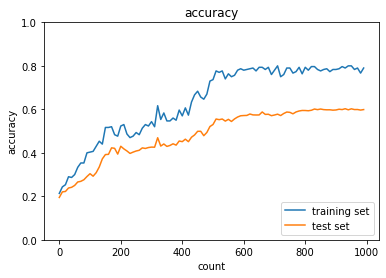

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**try5 : optimizer = optimizer.Adam, dropout_ratio = 0.15**



In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
#optimizer = optimizer.SGD(learning_rate=0.01)
#optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
#optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        

Generation: 10. 正答率(トレーニング) = 0.39
                : 10. 正答率(テスト) = 0.3193
Generation: 20. 正答率(トレーニング) = 0.5733333333333334
                : 20. 正答率(テスト) = 0.4561
Generation: 30. 正答率(トレーニング) = 0.6733333333333333
                : 30. 正答率(テスト) = 0.543
Generation: 40. 正答率(トレーニング) = 0.79
                : 40. 正答率(テスト) = 0.6237
Generation: 50. 正答率(トレーニング) = 0.8866666666666667
                : 50. 正答率(テスト) = 0.6842
Generation: 60. 正答率(トレーニング) = 0.9166666666666666
                : 60. 正答率(テスト) = 0.7098
Generation: 70. 正答率(トレーニング) = 0.9333333333333333
                : 70. 正答率(テスト) = 0.7255
Generation: 80. 正答率(トレーニング) = 0.9566666666666667
                : 80. 正答率(テスト) = 0.7507
Generation: 90. 正答率(トレーニング) = 0.9633333333333334
                : 90. 正答率(テスト) = 0.7604
Generation: 100. 正答率(トレーニング) = 0.9833333333333333
                : 100. 正答率(テスト) = 0.7698
Generation: 110. 正答率(トレーニング) = 0.9833333333333333
                : 110. 正答率(テスト) = 0.7643
Generation: 120. 正答率(トレーニング) = 0.9833333333333

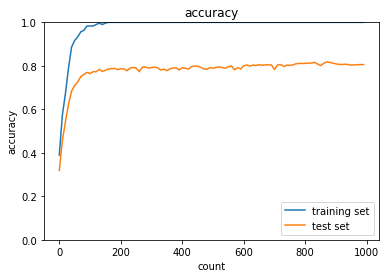

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**try6 : optimizer = optimizer.Adam, dropout_ratio = 0.3**



In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.3
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
#optimizer = optimizer.SGD(learning_rate=0.01)
#optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
#optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        

Generation: 10. 正答率(トレーニング) = 0.11333333333333333
                : 10. 正答率(テスト) = 0.101
Generation: 20. 正答率(トレーニング) = 0.18333333333333332
                : 20. 正答率(テスト) = 0.1613
Generation: 30. 正答率(トレーニング) = 0.2866666666666667
                : 30. 正答率(テスト) = 0.2353
Generation: 40. 正答率(トレーニング) = 0.33
                : 40. 正答率(テスト) = 0.2844
Generation: 50. 正答率(トレーニング) = 0.35
                : 50. 正答率(テスト) = 0.3066
Generation: 60. 正答率(トレーニング) = 0.37666666666666665
                : 60. 正答率(テスト) = 0.3176
Generation: 70. 正答率(トレーニング) = 0.45
                : 70. 正答率(テスト) = 0.3867
Generation: 80. 正答率(トレーニング) = 0.5533333333333333
                : 80. 正答率(テスト) = 0.4669
Generation: 90. 正答率(トレーニング) = 0.6666666666666666
                : 90. 正答率(テスト) = 0.5625
Generation: 100. 正答率(トレーニング) = 0.7566666666666667
                : 100. 正答率(テスト) = 0.6115
Generation: 110. 正答率(トレーニング) = 0.7933333333333333
                : 110. 正答率(テスト) = 0.6535
Generation: 120. 正答率(トレーニング) = 0.8333333333333334
       

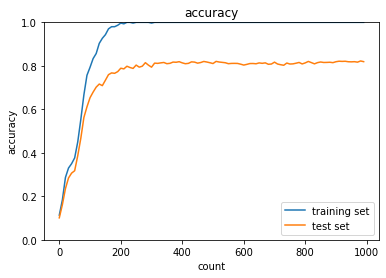

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**try7 : optimizer = optimizer.Adam, dropout_ratio = 0.5**



In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.5
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
#optimizer = optimizer.SGD(learning_rate=0.01)
#optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
#optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        

Generation: 10. 正答率(トレーニング) = 0.10666666666666667
                : 10. 正答率(テスト) = 0.0984
Generation: 20. 正答率(トレーニング) = 0.13666666666666666
                : 20. 正答率(テスト) = 0.1118
Generation: 30. 正答率(トレーニング) = 0.27
                : 30. 正答率(テスト) = 0.2294
Generation: 40. 正答率(トレーニング) = 0.2633333333333333
                : 40. 正答率(テスト) = 0.2268
Generation: 50. 正答率(トレーニング) = 0.2633333333333333
                : 50. 正答率(テスト) = 0.2238
Generation: 60. 正答率(トレーニング) = 0.23
                : 60. 正答率(テスト) = 0.2051
Generation: 70. 正答率(トレーニング) = 0.23
                : 70. 正答率(テスト) = 0.2037
Generation: 80. 正答率(トレーニング) = 0.22666666666666666
                : 80. 正答率(テスト) = 0.2029
Generation: 90. 正答率(トレーニング) = 0.24666666666666667
                : 90. 正答率(テスト) = 0.2164
Generation: 100. 正答率(トレーニング) = 0.25
                : 100. 正答率(テスト) = 0.2165
Generation: 110. 正答率(トレーニング) = 0.2866666666666667
                : 110. 正答率(テスト) = 0.2261
Generation: 120. 正答率(トレーニング) = 0.3
                : 120. 正答率(テスト) = 

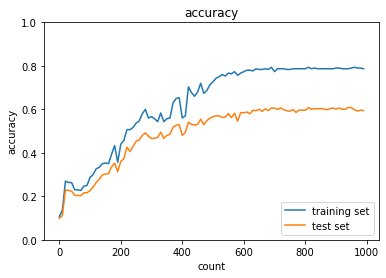

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout + L1

In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================


データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        

Generation: 10. 正答率(トレーニング) = 0.13666666666666666
                : 10. 正答率(テスト) = 0.1323
Generation: 20. 正答率(トレーニング) = 0.19
                : 20. 正答率(テスト) = 0.1671
Generation: 30. 正答率(トレーニング) = 0.24666666666666667
                : 30. 正答率(テスト) = 0.1915
Generation: 40. 正答率(トレーニング) = 0.2866666666666667
                : 40. 正答率(テスト) = 0.221
Generation: 50. 正答率(トレーニング) = 0.31333333333333335
                : 50. 正答率(テスト) = 0.24
Generation: 60. 正答率(トレーニング) = 0.3466666666666667
                : 60. 正答率(テスト) = 0.2645
Generation: 70. 正答率(トレーニング) = 0.38666666666666666
                : 70. 正答率(テスト) = 0.2882
Generation: 80. 正答率(トレーニング) = 0.43
                : 80. 正答率(テスト) = 0.3139
Generation: 90. 正答率(トレーニング) = 0.43333333333333335
                : 90. 正答率(テスト) = 0.3307
Generation: 100. 正答率(トレーニング) = 0.42333333333333334
                : 100. 正答率(テスト) = 0.3455
Generation: 110. 正答率(トレーニング) = 0.45666666666666667
                : 110. 正答率(テスト) = 0.3682
Generation: 120. 正答率(トレーニング) = 0.49333333

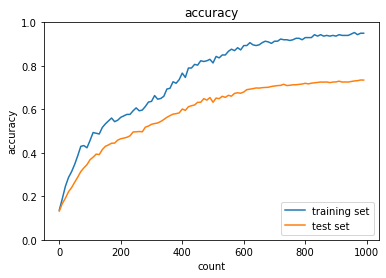

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()